In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Define la ruta del dataset
DATASET_DIRECTORY = './preciocasas.xlsx'

# Carga el dataset
df = pd.read_excel(DATASET_DIRECTORY)

# División de los datos en características y etiqueta
X = df.drop('UF', axis=1)
y = df['UF']

# Muestra las primeras filas del dataset para verificar que se haya cargado correctamente
df

,Descripcion,Habitaciones,Baños,Superficie Casa,Superficie Terreno,UF,VistaLago,Sectorcondominio,LugarCentrico
0,CASA Colegios Puerto Varas y Patagonia Puer…,4,4,130,350,6000,False,False,False
1,Casa en Puerto Chico Puerto Varas,2,2,100,250,4950,False,False,False
2,"Parcela ""Graneros de Puerto Varas""",4,4,221,5000,12522,False,True,False
3,"CASA Portal de Molino Viejo, Línea Nueva Pu…",4,3,250,5000,11000,False,True,False
4,CASA LA LAJA Puerto Varas,3,2,140,5000,6609,False,False,True
...,...,...,...,...,...,...,...,...,...
106,Casa en impecable ubicación en Puerto Varas,3,1,90,400,7652,False,False,False
107,casa sector mirador puerto varas,3,2,66,186,2609,False,False,True
108,CASA condominio Las Pataguas Puerto Varas,4,4,215,460,12000,False,True,False
109,Casa mirador de puerto varas,3,2,65,167,2435,False,False,False


In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Descripcion         111 non-null    object
 1   Habitaciones        111 non-null    int64 
 2   Baños               111 non-null    int64 
 3   Superficie Casa     111 non-null    int64 
 4   Superficie Terreno  111 non-null    int64 
 5   UF                  111 non-null    int64 
 6   VistaLago           111 non-null    bool  
 7   Sectorcondominio    111 non-null    bool  
 8   LugarCentrico       111 non-null    bool  
dtypes: bool(3), int64(5), object(1)
memory usage: 5.7+ KB


In [4]:
# Estadísticas descriptivas
df.describe()

,Habitaciones,Baños,Superficie Casa,Superficie Terreno,UF
count,111.000000,111.000000,111.000000,111.000000,111.00000
mean,3.405405,2.783784,173.855856,2743.621622,8061.36036
std,0.743192,0.994580,87.577171,2938.006978,4512.04116
min,1.000000,1.000000,46.000000,154.000000,870.00000
25%,3.000000,2.000000,110.000000,300.000000,5020.00000
50%,4.000000,3.000000,160.000000,660.000000,7652.00000
75%,4.000000,4.000000,212.500000,5000.000000,9950.00000
max,4.000000,4.000000,528.000000,16593.000000,27000.00000


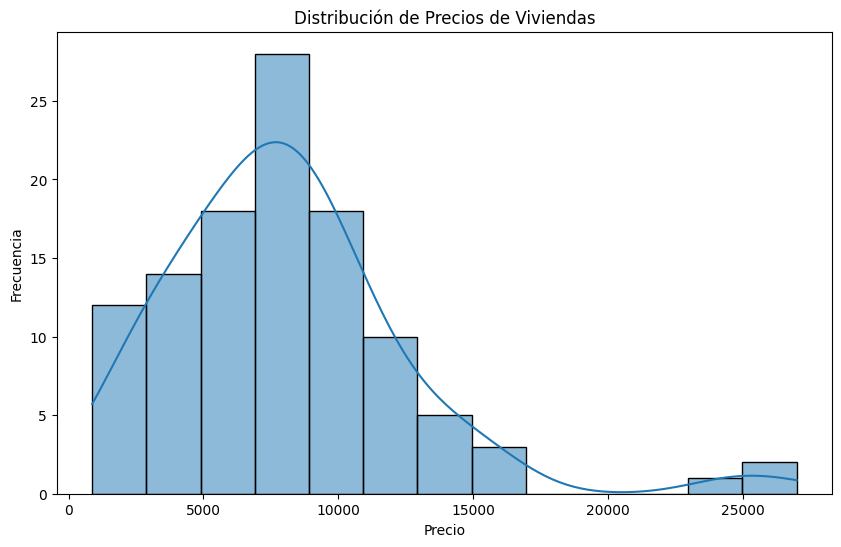

In [5]:
# Visualización de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['UF'], kde=True)
plt.title('Distribución de Precios de Viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Modelo de Machine Learning

In [6]:
# Preprocesamiento de datos
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
# Codificación de variables categóricas con OneHotEncoder
categorical_features = ['VistaLago', 'Sectorcondominio', 'LugarCentrico']
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(df[categorical_features])

# Crear un DataFrame con las variables codificadas
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_features))

# Mostrar las primeras filas del DataFrame codificado
onehot_encoded_df.head()

,VistaLago_True,Sectorcondominio_True,LugarCentrico_True
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [8]:
# Concatenación de las columnas codificadas con el DataFrame original
df = pd.concat([df.drop(columns=categorical_features), onehot_encoded_df], axis=1)

In [9]:
df.head()

,Descripcion,Habitaciones,Baños,Superficie Casa,Superficie Terreno,UF,VistaLago_True,Sectorcondominio_True,LugarCentrico_True
0,CASA Colegios Puerto Varas y Patagonia Puer…,4,4,130,350,6000,0.0,0.0,0.0
1,Casa en Puerto Chico Puerto Varas,2,2,100,250,4950,0.0,0.0,0.0
2,"Parcela ""Graneros de Puerto Varas""",4,4,221,5000,12522,0.0,1.0,0.0
3,"CASA Portal de Molino Viejo, Línea Nueva Pu…",4,3,250,5000,11000,0.0,1.0,0.0
4,CASA LA LAJA Puerto Varas,3,2,140,5000,6609,0.0,0.0,1.0


In [10]:
# Importar librerías necesarias para el preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir características numéricas y categóricas
numeric_features = ['Habitaciones', 'Baños', 'Superficie Casa', 'Superficie Terreno']
categorical_features = ['VistaLago', 'Sectorcondominio', 'LugarCentrico']

# Crear los pipelines para normalización y codificación
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplicar el preprocesamiento
X_preprocessed = preprocessor.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [12]:
# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Entrenamiento con Regresión Lineal

In [13]:
# Inicialización y entrenamiento del modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [14]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# predicción
print(f'acurracy: {r2}')

acurracy: 0.412963444003138


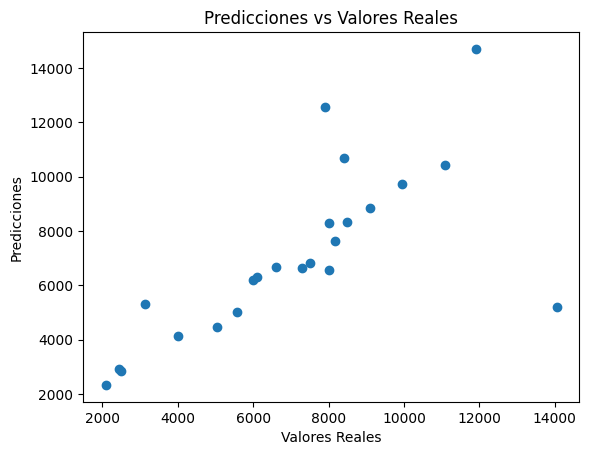

In [15]:
# Visualización de predicciones vs valores reales
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

## Entrenamiento con Random Forest

In [16]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [17]:
# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Predicción
print(f'acurracy: {r2_rf}')

acurracy: 0.573852685756802


Text(0.5, 1.0, 'Predicciones vs Valores Reales (Random Forest)')

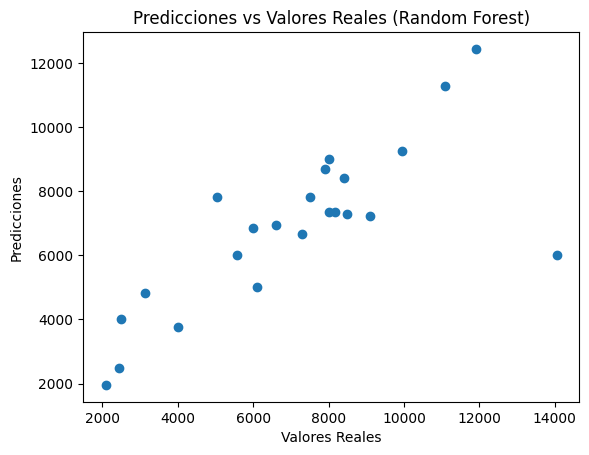

In [18]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Random Forest)')

## Entrenamiento con Árbol de Decisión

In [19]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

In [20]:
#Evaluación del modelo de Árbol de Decisión
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'acurracy: {r2_dt}')

acurracy: 0.23414291066757253


Text(0.5, 1.0, 'Predicciones vs Valores Reales (Decision Tree)')

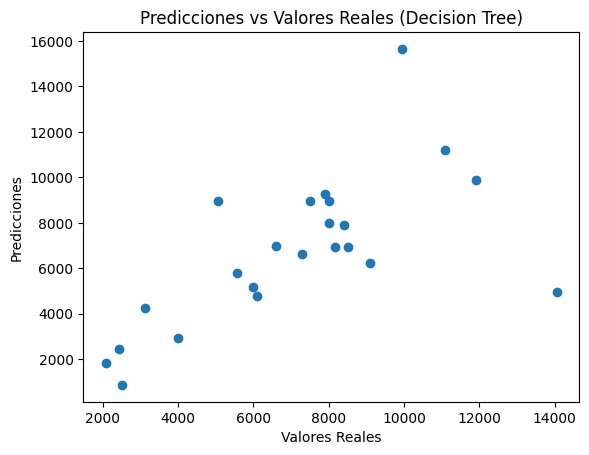

In [21]:
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Decision Tree)')

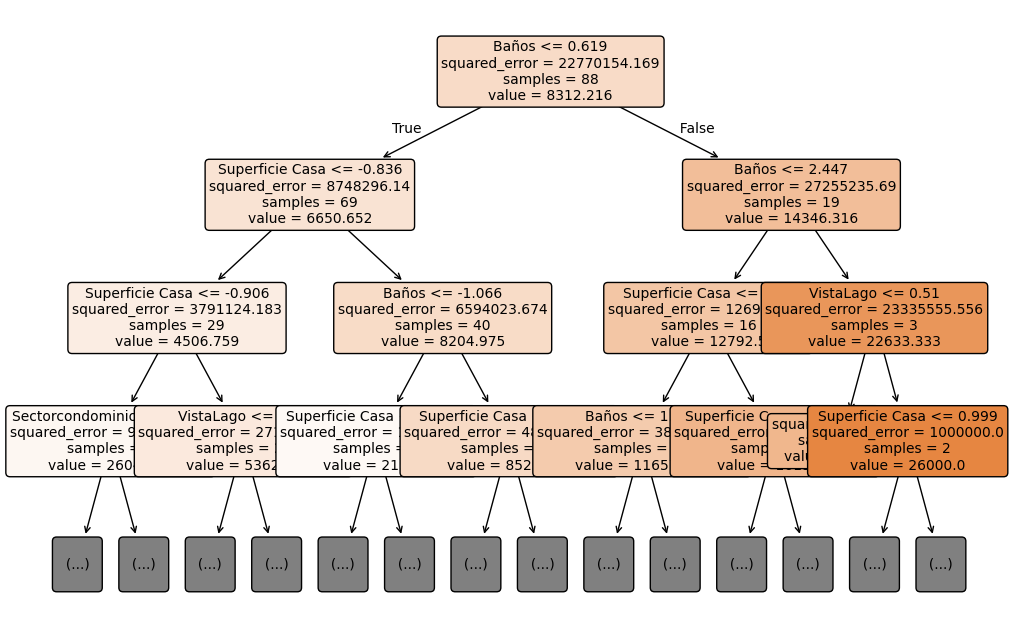

In [22]:
plt.figure(figsize=(12,8))
plot_tree(model_dt, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.show()

# Modelo de Deep Learning

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),  
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Una sola salida para predecir 'UF'
])

model_dl.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\stbnr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compilación del modelo de deep learning
model_dl.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Verificar y convertir los datos a numpy arrays
X_train = np.array(X_train)
y_train = np.array([y_train])
X_test = np.array(X_test)
y_test = np.array(y_test)

# Si y_train es un escalar o tiene forma (1,)
if y_train.ndim == 0 or (y_train.ndim == 1 and len(y_train) == 1):
    y_train = np.full(X_train.shape[0], y_train)
# Si y_train es un array 2D con forma (1, n)
elif y_train.ndim == 2 and y_train.shape[0] == 1:
    y_train = y_train.flatten()


if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)

In [26]:
X_train = np.atleast_2d(X_train)
y_train = np.ravel(y_train)


In [27]:
# Entrenamiento del modelo de deep learning
history_dl = model_dl.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 93487688.0000 - val_loss: 106880968.0000
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 87366096.0000 - val_loss: 106878664.0000
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 96613016.0000 - val_loss: 106876816.0000
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 88766096.0000 - val_loss: 106875008.0000
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 95636800.0000 - val_loss: 106873144.0000
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 80382976.0000 - val_loss: 106871136.0000
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 87197888.0000 - val_loss: 106868816.0000
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 81002480.0000 - val_loss: 106866176.0000
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 95798256.0000 - val_loss: 106862928.0000
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 93520520.0000 - val_loss: 106859112.0000
Epoch 11/

In [28]:
# Evaluación del modelo de deep learning
loss_dl = model_dl.evaluate(X_test, y_test)
print(f'Loss en el conjunto de prueba (DL): {loss_dl}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9088333.0000
Loss en el conjunto de prueba (DL): 9088333.0


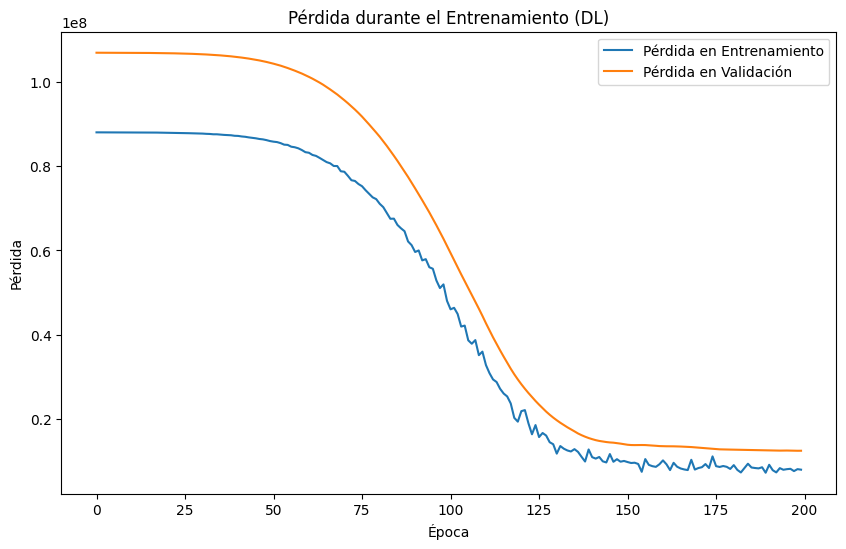

In [29]:
# Gráfica de la pérdida durante el entrenamiento del modelo de deep learning
plt.figure(figsize=(10, 6))
plt.plot(history_dl.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history_dl.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida durante el Entrenamiento (DL)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [30]:
# Predicciones del modelo de deep learning
y_pred_dl = model_dl.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [31]:
# Calcular el R² del modelo de deep learning
r2_dl = r2_score(y_test, y_pred_dl)

In [32]:
# Comparar algunas predicciones con los valores reales
comparison = pd.DataFrame({'Real': y_test, 'Predicción DL': y_pred_dl.flatten()})
print(comparison.head(10))

    Real  Predicción DL
0   7500    6935.483887
1  11900   13991.510742
2   6609    4430.765625
3  11080   10638.183594
4   8500   11459.557617
5   9100    9365.340820
6   5565    4506.041016
7   6106    5443.801270
8   8000    7459.287109
9   8000    8447.841797


In [33]:
print(f"El modelo de machine learning tiene un accurracy de: {r2}")


El modelo de machine learning tiene un accurracy de:  0.412963444003138


# Conclusiones
De acuerdo a lo que se mostro en el codigo, podemos considerar que los bajos resultados se deben a distintas razones entre las cuales estan el numero de filas del dataset (considerablemente pequeño para estos casos), atributos no significativos (como vista al lago, lugar centrico o sector condominio), entre otros.
